Vamos obter informações sobre o rendimento de alunos de um curso em algumas disciplinas ao longo dos anos.

O primeiro arquivo contido no Dataset Notas, historico-alg1_SIGA_ANONIMIZADO.csv, refere-se ao aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.

A primeira coluna ("matricula") é composta por números inteiros, onde cada número representa um indivíduo. Assim, repetições nessa coluna indicam que o estudante fez mais de uma vez a mesma matéria.

Atenção: R-nota indica REPROVAÇÃO POR NOTA e R-freq REPROVAÇÃO POR FALTA. Se houver outro "status" para representar reprovação, este dever ser trocado para o rótulo adequado (R-nota ou R-freq). Frequências < 75 causam reprovação por falta; Médias abaixo de 50 causam reprovação por nota.

Analise o dataset do referido arquivo para responder as seguintes perguntas:

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

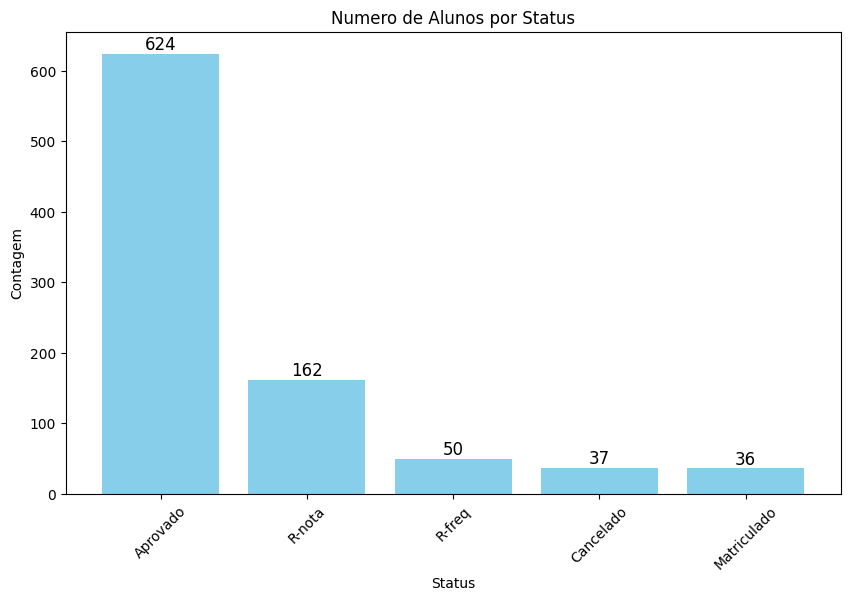

In [54]:
df = pd.read_csv('historico-alg1_SIGA_ANONIMIZADO.csv')

# Equivalência -> Excluído pois são alunos que foram aprovados na matéria em outro curso.
# Matriculado -> Excluído pois estão realizando a matéria neste momento.
# Cancelado -> Cancelados foram alunos que desistiram da matéria, por isso considera como não tivesse realizado a matéria.
df.loc[(df['nota'] < 50) & (df['tipo'] != 'EQUIVALENCIA') & (df['status'] != 'Matriculado' ) & (df['status'] != 'Cancelado' ), 'status'] = 'R-nota'
df.loc[(df['frequencia'] < 75) & (df['tipo'] != 'EQUIVALENCIA') & (df['status'] != 'Matriculado' ) & (df['status'] != 'Cancelado' ), 'status'] = 'R-freq'

contagem_status = df['status'].value_counts()
for i, count in enumerate(contagem_status):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
contagem_status.plot(figsize=(10, 6),
                    kind='bar',
                    color='skyblue',
                    title='Numero de Alunos por Status',
                    xlabel='Status',
                    ylabel='Contagem',
                    width=0.8,
                    rot=45)
plt.show()

1. Qual é a média de nota dos aprovados (no período total e por ano)?

In [65]:
# Equivalência -> Excluído pois são alunos que foram aprovados na matéria em outro curso
# Sua nota e frequência estão zerados, para não afetar a média final excluí deste calculo
aprovados = df[(df['status'] == 'Aprovado') & (df['tipo'] != 'EQUIVALENCIA')]

# Média em todo o período de Tempo
media_aprovados_total = aprovados['nota'].mean()
media_aprovados_total
# Média por ano
media_aprovados_por_ano = aprovados.groupby('ano')['nota'].mean()

# Gráfico
for i, (ano, media) in enumerate(media_aprovados_por_ano.items()):
    plt.text(i, media, f"{media:.1f}", ha='center', va='bottom', fontsize=12)
media_aprovados_por_ano.plot(figsize=(10, 6),
                            kind='bar',
                            color='skyblue',
                            title='Média dos Alunos Aprovados',
                            xlabel='Ano',
                            ylabel='Média',
                            width=0.8,
                            rot=45)
plt.show()

77.58004158004158


2. Qual é a média de nota dos reprovados por nota (período total e ano)?

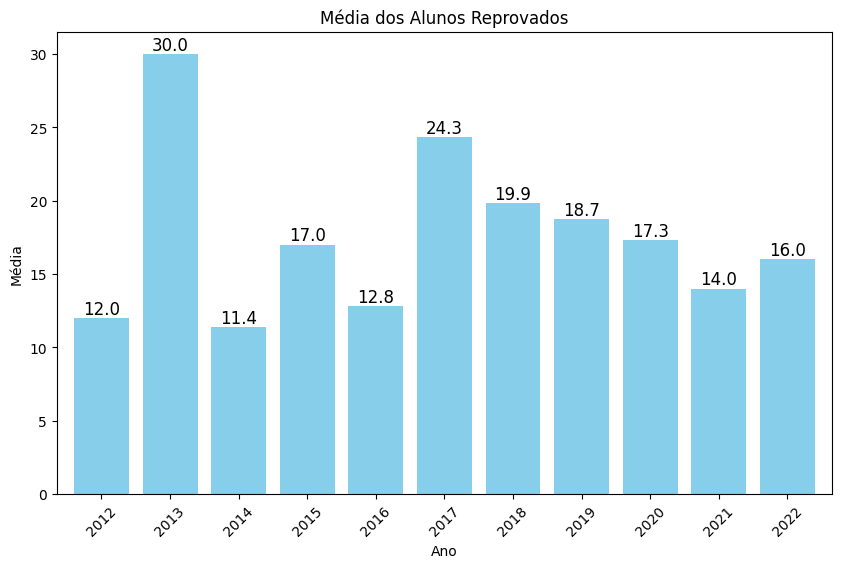

In [34]:
# Considerado todos os alunos que reprovaram (Nota e Frequência) e tiveram uma Nota inferior a 50
# Assim conseguimos analisar todos os alunos que tiveram a nota inferior a 50 mesmo que tenham reprovado por frequência.
reprovados_nota = df[(df['status'] == 'R-nota') | ((df['status'] == 'R-freq') & (df['nota'] < 50 ))]

# Média em todo o período de Tempo
media_reprovados_total = reprovados_nota['nota'].mean()

# Média por ano
media_reprovados_por_ano = reprovados_nota.groupby('ano')['nota'].mean()

# Gráfico
for i, (ano, media) in enumerate(media_reprovados_por_ano.items()):
    plt.text(i, media, f"{media:.1f}", ha='center', va='bottom', fontsize=12)
media_reprovados_por_ano.plot(figsize=(10, 6),
                            kind='bar',
                            color='skyblue',
                            title='Média dos Alunos Reprovados',
                            xlabel='Ano',
                            ylabel='Média',
                            width=0.8,
                            rot=45)
plt.show()

3. Qual é a frequência dos reprovados por nota (período total e por ano)?

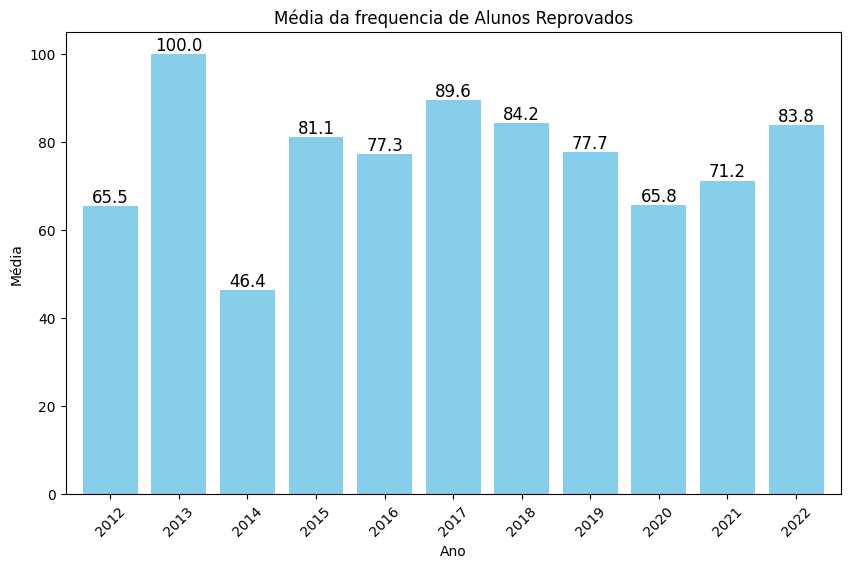

In [35]:
# Como anteriormente incluímos os alunos com nota inferior a 50 que reprovaram por frequência, aqui conseguimos ter uma amostra próxima da realidade da média da frequência dos alunos.
# Média da Frequência dos alunos reprovados

# Média em todo o período de Tempo
media_frequencia_reprovados_total = reprovados_nota['frequencia'].mean()

# Média por ano
media_frequencia_reprovados_por_ano = reprovados_nota.groupby('ano')['frequencia'].mean()

# Gráfico
for i, (ano, media) in enumerate(media_frequencia_reprovados_por_ano.items()):
    plt.text(i, media, f"{media:.1f}", ha='center', va='bottom', fontsize=12)
media_frequencia_reprovados_por_ano.plot(figsize=(10, 6),
                            kind='bar',
                            color='skyblue',
                            title='Média da frequencia de Alunos Reprovados',
                            xlabel='Ano',
                            ylabel='Média',
                            width=0.8,
                            rot=45)
plt.show()

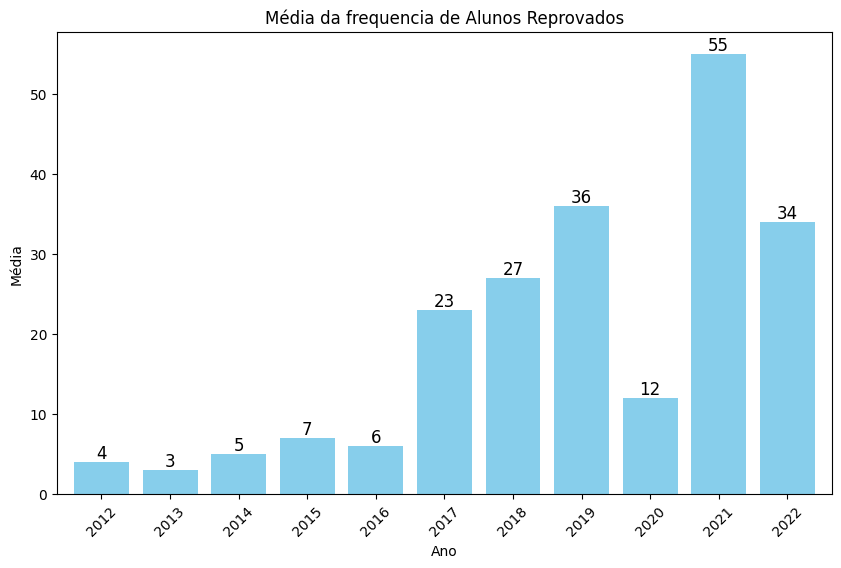

In [36]:
# Quantidade de alunos reprovados

# Quantidade em todo o periodo de Tempo
frequencia_reprovados_total = len(reprovados_nota)

# Quantidade por ano
frequencia_reprovados_por_ano = reprovados_nota.groupby('ano').size()

# Gráfico
for i, (ano, soma) in enumerate(frequencia_reprovados_por_ano.items()):
    plt.text(i, soma, f"{soma:.0f}", ha='center', va='bottom', fontsize=12)
frequencia_reprovados_por_ano.plot(figsize=(10, 6),
                            kind='bar',
                            color='skyblue',
                            title='Média da frequencia de Alunos Reprovados',
                            xlabel='Ano',
                            ylabel='Média',
                            width=0.8,
                            rot=45)
plt.show()


4. Qual a porcentagem de evasões (total e anual)?

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


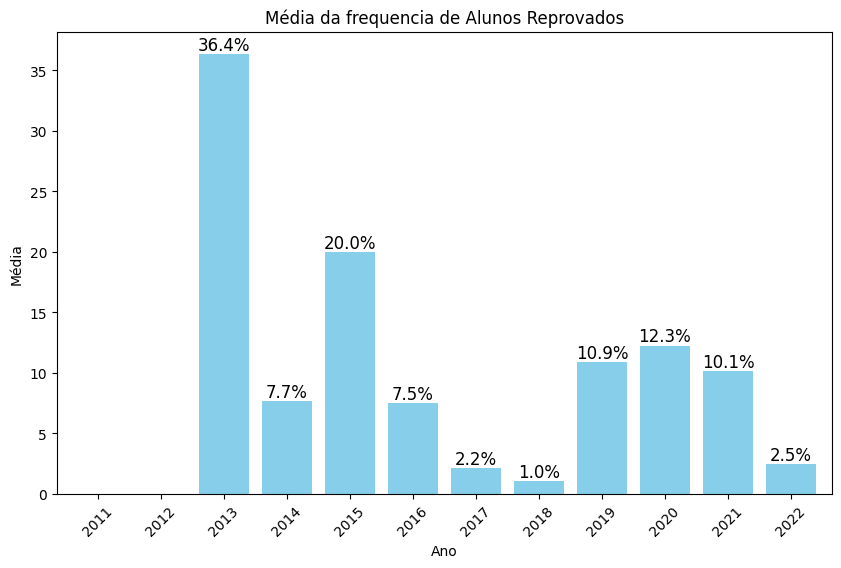

In [71]:
# Dataframe com todos os alunos com a Situação Discente igual Evasão
df_unique = df.sort_values(by=['ano', 'periodo'], ascending=False).drop_duplicates(subset='matricula', keep='first')

evasoes = df[df['situacaoDiscente'] == 'Evasão']
evasoes = evasoes.sort_values(by=['ano', 'periodo'], ascending=False).drop_duplicates(subset='matricula', keep='first')

# Parcentagem de evasões em relação ao todo
porcentagem_evasoes_total = ( len(evasoes) / len(df_unique) ) * 100
porcentagem_evasoes_total = "{:.2f}%".format(porcentagem_evasoes_total)

# Parcentagem de evasões em relação ao todos em cada ano
porcentagem_evasoes_por_ano = (evasoes.groupby('ano').size() / df.groupby('ano').size()) * 100

# Gráfico
for i, (ano, porcent) in enumerate(porcentagem_evasoes_por_ano.items()):
    plt.text(i, porcent, f"{porcent:.1f}%", ha='center', va='bottom', fontsize=12)
porcentagem_evasoes_por_ano.plot(figsize=(10, 6),
                            kind='bar',
                            color='skyblue',
                            title='Média da frequencia de Alunos Reprovados',
                            xlabel='Ano',
                            ylabel='Média',
                            width=0.8,
                            rot=45)
plt.show()

5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

In [74]:
# Separar os dados dos anos de pandemia e dos anos anteriores
anos_pandemia = df[df['ano'].isin([2020, 2021])]
anos_sem_pandemia = df[df['ano'] < 2020 ]

# Analisar o rendimento dos aprovados
aprovados_pandemia = anos_pandemia[anos_pandemia['status'] == 'Aprovado']
aprovados_sem_pandemia = anos_sem_pandemia[anos_sem_pandemia['status'] == 'Aprovado']


# Analisar a taxa de cancelamento
cancelamentos_pandemia = anos_pandemia[anos_pandemia['status'] == 'Cancelamento']
cancelamentos_sem_pandemia = anos_sem_pandemia[anos_sem_pandemia['status'] == 'Cancelamento']

# Analisar as reprovações
reprovacoes_pandemia = anos_pandemia[anos_pande mia['status'].str.contains('R-')]
reprovacoes_sem_pandemia = anos_sem_pandemia[anos_sem_pandemia['status'].str.contains('R-')]
# Comparar os dados entre os anos de pandemia e os anos anteriores
# Você pode calcular médias, frequências, porcentagens, ou outras métricas relevantes para a análise

# Resultados
# Insira aqui as análises comparativas entre os anos de pandemia e os anos anteriores

6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

In [39]:
# Separar os dados do primeiro período de 2022, dos anos de pandemia e dos anos anteriores
ano_hibrido = df[(df['ano'] == 2022) & (df['periodo'] == 1)]

# Analisar o rendimento dos aprovados
aprovados_volta_aulas_hibrida_2022 = ano_hibrido[ano_hibrido['status'] == 'Aprovado']
aprovados_pandemia = anos_pandemia[anos_pandemia['status'] == 'Aprovado']
aprovados_anteriores = anos_sem_pandemia[anos_sem_pandemia['status'] == 'Aprovado']

# Analisar a taxa de cancelamento
cancelamentos_volta_aulas_hibrida_2022 = ano_hibrido[ano_hibrido['status'] == 'Cancelamento']
cancelamentos_pandemia = anos_pandemia[anos_pandemia['status'] == 'Cancelamento']
cancelamentos_anteriores = anos_sem_pandemia[anos_sem_pandemia['status'] == 'Cancelamento']

# Analisar as reprovações
reprovacoes_volta_aulas_hibrida_2022 = ano_hibrido[ano_hibrido['status'].str.contains('R-')]
reprovacoes_pandemia = anos_pandemia[anos_pandemia['status'].str.contains('R-')]
reprovacoes_anteriores = anos_sem_pandemia[anos_sem_pandemia['status'].str.contains('R-')]

# Comparar os dados entre a volta às aulas híbrida de 2022, os anos de pandemia e os anos anteriores
# Você pode calcular métricas relevantes para a comparação e analisar os resultados

# Resultados
# Insira aqui as análises comparativas entre a volta às aulas híbrida de 2022, os anos de pandemia e os anos anteriores

7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

In [40]:
# Não é possível comparar Nota e Frequência com o 2 período de 2022, pois o período em questão ainda não foi finalizado
# Podemos fazer algumas outras comparações como:
# Quantidade de Alunos?


In [41]:
df.to_csv('updated_data.csv', index=False)